In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import sys
sys.path.insert(0, 'models/abm/')
from mark0_inflation_shock import Mark0_INFLATION_SHOCK
import yaml
from matplotlib import pyplot as plt
import pickle
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D#
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.patches as mpatches

from plotting import plot_different_shocks, plot_simplified

In [4]:
file_path = 'models/abm'
param_path = f'{file_path}/mark0_inflation_shock/parameters/'

    
save = 'test'
cb = ['noCB'] # we always take no CB parameter and add the other parameters manually
name = 'activeCB'
policy = 'adaptive_policy'
results_shocks = {}
taut=0.95
gw = 0.8
gp = 0.8
counter = 1
gammae = 0.065/2

with open(param_path + f'/default_parameters_{cb[0]}.yaml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
with open(param_path + f'default_hyper_parameters_{policy}.yaml') as f:
    hyper_params = yaml.load(f, Loader=yaml.FullLoader)

theta = 3.2

params['delta_e'] = 0.04
params['kappa'] = 1.3 #2.2
params['alpha'] = 1*12
params['alpha_g'] = (50/4)*12
params['gamma_e'] = gammae
params['gamma_p'] = gp
params['shock_st'] = 1.0   #######
params['wage_factor'] = gw
params['y0'] = 0.9
#params['eta0m'] = 0.25#0.2

### Shock parameter
hyper_params['delta_w'] = 0.04
hyper_params['zfactor'] = 0.7
hyper_params['policy_end'] = 5000


# price and ext productio shock
hyper_params['tprod'] = 10
hyper_params['price_start'] = 4000 #4018 4015
hyper_params['price_end'] =  4035#4027 4039
params['delta_p'] = 0.01 
hyper_params['policy_end'] = 4044#4024 #4027

# Inactive CB 
params['theta'] = theta
params['tau_tar'] = 0
params['tau_r'] = 1
params['phi_pi'] = 0
params['rho0'] = 0.001
params['pi_target'] = 0
params['alpha_i'] = 0.0 # adaptive expectations turned off
params['omega_i'] = 0.0 # adaptive expectations turned off
mk = Mark0_INFLATION_SHOCK(params, hyper_params)
results_shocks[f'Inactive CB, All shocks, easy-credit'] = mk.simulate(save=save)


# Reactive CB with anchored expectation
params['theta'] = theta
params['tau_tar'] = taut
params['tau_r'] = 1-taut
params['phi_pi'] = 1
params['rho0'] = 0.001
params['pi_target'] = 0.002
params['alpha_i'] = 0.0 # adaptive expectations turned off
params['omega_i'] = 0.0 # adaptive expectations turned off

mk = Mark0_INFLATION_SHOCK(params, hyper_params)
results_shocks[f'Reactive CB, Anchored Expectation, All shocks, easy-credit'] = mk.simulate(save=save)


# Reactive CB with floating expectation
params['theta'] = theta
params['tau_tar'] = 0.5
params['tau_r'] = 0.5
params['phi_pi'] = 1
params['rho0'] = 0.001
params['pi_target'] = 0.002
params['alpha_i'] = 0.4 # adaptive expectations turned off
params['omega_i'] = 0.2 # adaptive expectations turned off


mk = Mark0_INFLATION_SHOCK(params, hyper_params)
results_shocks[f'Reactive CB, Floating Expectation, All shocks, easy-credit'] = mk.simulate(save=save)






C:\Users\max-k\Documents\MABM\Mark0_inflation\models\abm/mark0_inflation_shock/mark0_inflation_shock 2.0 3.2 0.0 0.001 12 0 0.0 0 0.0 0 0.8 0.9 0.01 0.2 1 150.0 1.0 1.3 0.5 0.1 0.2 0.02 0.0325 0.01 0.0 0.0 0 0.002 0.8 1.0 0.04 0.7 0.7 0 4 4000 4005 4000 4044 0.0 10000 0.0 1.0 1.0 5000 200 1 1 0 10 4000 4035 0 0.04 C:\Users\max-k\Documents\MABM\Mark0_inflation\output\mark0_inflation_shock_test
C:\Users\max-k\Documents\MABM\Mark0_inflation\models\abm/mark0_inflation_shock/mark0_inflation_shock 2.0 3.2 0.0 0.001 12 1 0.0 0.002 0.0 0.95 0.8 0.9 0.01 0.2 0.050000000000000044 150.0 1.0 1.3 0.5 0.1 0.2 0.02 0.0325 0.01 0.0 0.0 0 0.002 0.8 1.0 0.04 0.7 0.7 0 4 4000 4005 4000 4044 0.0 10000 0.0 1.0 1.0 5000 200 1 1 0 10 4000 4035 0 0.04 C:\Users\max-k\Documents\MABM\Mark0_inflation\output\mark0_inflation_shock_test
C:\Users\max-k\Documents\MABM\Mark0_inflation\models\abm/mark0_inflation_shock/mark0_inflation_shock 2.0 3.2 0.0 0.001 12 1 0.0 0.002 0.0 0.5 0.8 0.9 0.01 0.2 0.5 150.0 1.0 1.3 0.5 0

Inactive CB, All shocks, easy-credit (130, 37) 3990 4120 (5000, 37)
Reactive CB, Anchored Expectation, All shocks, easy-credit (130, 37) 3990 4120 (5000, 37)
Reactive CB, Floating Expectation, All shocks, easy-credit (130, 37) 3990 4120 (5000, 37)


C:\Users\max-k\Documents\MABM\Mark0_inflation\plotting.py:192: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


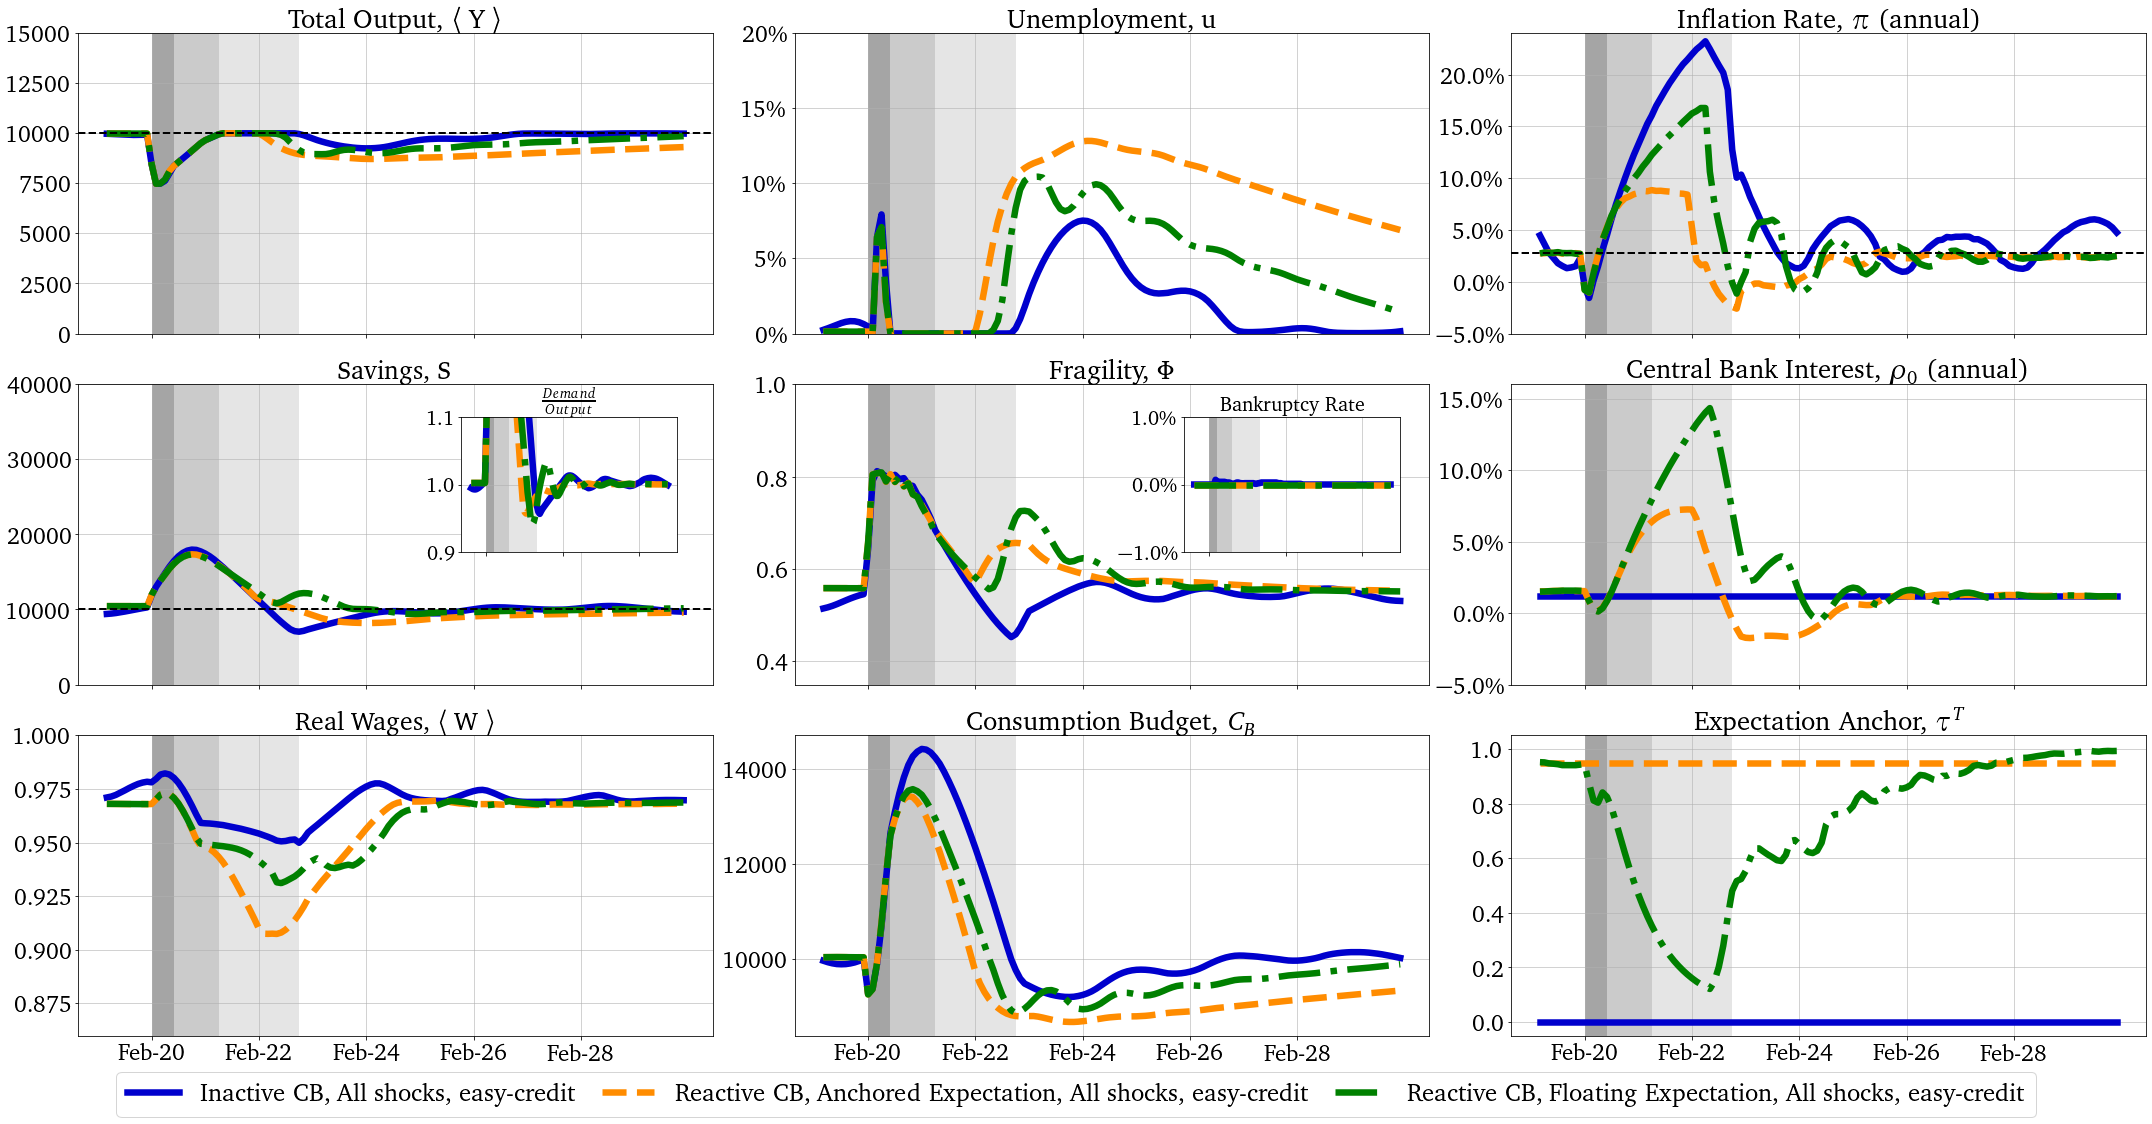

In [5]:
shocks = ['Inactive CB, All shocks, easy-credit', 'Reactive CB, Anchored Expectation, All shocks, easy-credit', 'Reactive CB, Floating Expectation, All shocks, easy-credit']
plot_different_shocks(results_shocks.copy(), inflationx = [-0.05,0.24], wagex=[0.86,1],fragx=[0.35,1.0], bankruptx=[-0.01,0.01], cbx=[-0.05,0.16], unempx=[0,0.2], savingsx = [0, 40000], shock=False, setzero = 3800, p_shock=9,
                        shocks=shocks, xaxis=[4000, 6000],  fontsize=28, legendfontsize=15.5, figsize=(30,15), save ='', t_endx=120, cmap='viridis', s=[1,2,3], ncol=3)

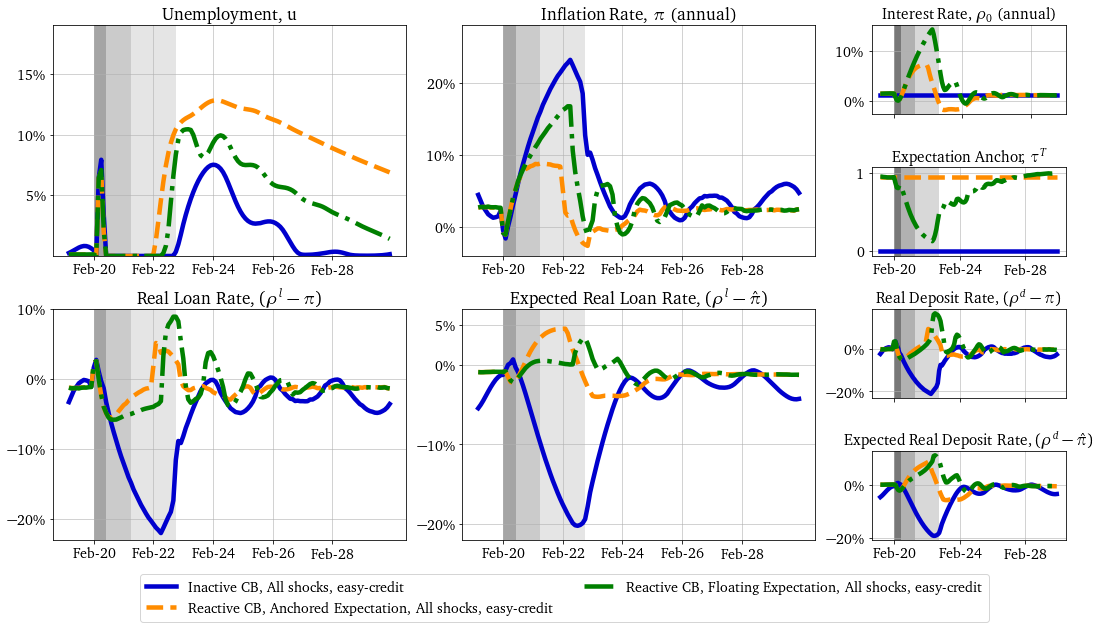

In [6]:
plot_simplified(results_shocks, shocks, t_start=[4000, 6000], t_endx=120,
                fontsize=18, setzero=3800, cmap='viridis', save=save,
                ylim_u=[0,0.19], yticks_u=[0.05 ,0.1, 0.15], ylim_pi=[-0.04,0.28], yticks_pi=[0, 0.1 ,0.2],
                ylim_real=[-0.23,0.1], yticks_real=[-0.2, -0.1, 0, 0.1], ylim_realexp=[-0.22, 0.07], yticks_realexp=[-0.2, -0.1, 0, 0.05])
